# Installation And Importing Libraries

In [6]:
! pip install collections-extended
! pip install langdetect
! pip install googletrans
! pip install seaborn
! pip install contractions
! pip install yake
! pip install rake_nltk
! pip install unidecode
! pip install googletrans==3.1.0a0
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=9fd01e68de9dd809bdbe2ff2bfc57f7e0cdb20538f79dc551170ffe04c2eb884
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 k

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
# import libraries
from collections import Counter
from langdetect import detect
from googletrans import Translator
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import contractions
from nltk.corpus import stopwords
from string import punctuation
from unidecode import unidecode
!pip install autocorrect
from autocorrect import Speller

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=3e2bd46268ea6531b87f8b172b6febf946e58336b06367ddf530da44d077b985
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [43]:
data = pd.read_csv("dataset_es_train.csv")
data.shape

(200000, 8)

In [45]:
sample = data.sample(1000)
sample.reset_index(drop=True,inplace=True)
sample.stars.unique()

array([4, 2, 3, 1, 5])

In [46]:
df = sample[['review_body','stars']]
df

,review_body,stars
0,"Llegó muy rápido, viene con un cuadernillo y d...",4
1,El paquete de 10 unidades me ha venido con dos...,2
2,Me ha llegado en perfectas condiciones y el dí...,4
3,Totalmente distinto al de la foto q tenían cua...,3
4,"Estoy esperando para hacer la devolución, el t...",1
...,...,...
995,Muy buen producto. Trámite rapido,5
996,Lo utilizo para la pared con unos electrodomes...,4
997,Todo bien.lo q esperaba,5
998,"La lámpara es muy bonita pero da muy poca luz,...",2


In [47]:
def lang_detect(data):
  lang = detect(data)
  return lang

In [48]:
df['language'] = df.review_body.apply(lang_detect)
df

,review_body,stars,language
0,"Llegó muy rápido, viene con un cuadernillo y d...",4,es
1,El paquete de 10 unidades me ha venido con dos...,2,es
2,Me ha llegado en perfectas condiciones y el dí...,4,es
3,Totalmente distinto al de la foto q tenían cua...,3,es
4,"Estoy esperando para hacer la devolución, el t...",1,es
...,...,...,...
995,Muy buen producto. Trámite rapido,5,es
996,Lo utilizo para la pared con unos electrodomes...,4,es
997,Todo bien.lo q esperaba,5,es
998,"La lámpara es muy bonita pero da muy poca luz,...",2,es


In [49]:
def lang_trans(data):
  translator = Translator()
  translated_text = translator.translate(data)
  return translated_text.text

df['translated_reviews']= df.review_body.apply(lang_trans)

In [50]:
df

,review_body,stars,language,translated_reviews
0,"Llegó muy rápido, viene con un cuadernillo y d...",4,es,"It arrived very quickly, it comes with a bookl..."
1,El paquete de 10 unidades me ha venido con dos...,2,es,The package of 10 units came with two without ...
2,Me ha llegado en perfectas condiciones y el dí...,4,es,It arrived to me in perfect condition and on t...
3,Totalmente distinto al de la foto q tenían cua...,3,es,Totally different from the photo they had when...
4,"Estoy esperando para hacer la devolución, el t...",1,es,"I'm waiting to make the return, the terminal d..."
...,...,...,...,...
995,Muy buen producto. Trámite rapido,5,es,Very good product. Fast processing
996,Lo utilizo para la pared con unos electrodomes...,4,es,I use it for the wall with some appliances fro...
997,Todo bien.lo q esperaba,5,es,"All good, what I expected"
998,"La lámpara es muy bonita pero da muy poca luz,...",2,es,The lamp is very nice but it gives very little...


## EDA

In [51]:
def ngram_extractor(data,ngram_range):
  tokens = word_tokenize(data)
  ngram = ngrams(tokens,ngram_range)     # output >> zip file
  ngram_list1 = []
  for ngram1 in ngram:
    ngram_list1.append(' '.join(ngram1))
  return ngram_list1

In [52]:
list_unigrams = df.translated_reviews.apply(lambda x : ngram_extractor(x,1))
list_unigrams

0      [It, arrived, very, quickly, ,, it, comes, wit...
1      [The, package, of, 10, units, came, with, two,...
2      [It, arrived, to, me, in, perfect, condition, ...
3      [Totally, different, from, the, photo, they, h...
4      [I, 'm, waiting, to, make, the, return, ,, the...
                             ...                        
995           [Very, good, product, ., Fast, processing]
996    [I, use, it, for, the, wall, with, some, appli...
997                    [All, good, ,, what, I, expected]
998    [The, lamp, is, very, nice, but, it, gives, ve...
999    [Perfect, quality, at, a, very, good, price, I...
Name: translated_reviews, Length: 1000, dtype: object

In [53]:
final_unigram = []
for unigram in list_unigrams:
  final_unigram.extend(unigram)

In [54]:
cnt_1= Counter(final_unigram).most_common(25)
cnt_1

[('.', 1716),
 ('the', 1695),
 (',', 1563),
 ('it', 1557),
 ('I', 1049),
 ('and', 976),
 ('is', 794),
 ('to', 736),
 ('a', 701),
 ('not', 428),
 ('for', 402),
 ('that', 401),
 ('of', 386),
 ('very', 346),
 ("n't", 338),
 ('It', 328),
 ('in', 311),
 ('The', 308),
 ('but', 307),
 ('have', 289),
 ('with', 279),
 ('you', 231),
 ('good', 225),
 ('they', 200),
 ('are', 196)]

In [55]:
list_bigrams = df.translated_reviews.apply(lambda x : ngram_extractor(x,2))
list_bigrams

0      [It arrived, arrived very, very quickly, quick...
1      [The package, package of, of 10, 10 units, uni...
2      [It arrived, arrived to, to me, me in, in perf...
3      [Totally different, different from, from the, ...
4      [I 'm, 'm waiting, waiting to, to make, make t...
                             ...                        
995    [Very good, good product, product ., . Fast, F...
996    [I use, use it, it for, for the, the wall, wal...
997       [All good, good ,, , what, what I, I expected]
998    [The lamp, lamp is, is very, very nice, nice b...
999    [Perfect quality, quality at, at a, a very, ve...
Name: translated_reviews, Length: 1000, dtype: object

In [56]:
final_bigrams=[]
for bigram in list_bigrams:
  final_bigrams.extend(bigram)

In [57]:
cnt_2 = Counter(final_bigrams).most_common(25)
cnt_2

[(', it', 251),
 ('. I', 218),
 ('it is', 215),
 (', I', 173),
 (', the', 163),
 ('. The', 153),
 (', but', 140),
 ('of the', 134),
 ('. It', 128),
 ('I have', 125),
 ('and it', 121),
 ('in the', 103),
 ('and the', 100),
 ("do n't", 98),
 ('is not', 97),
 ('does not', 90),
 (', and', 89),
 ('it does', 88),
 ('I do', 85),
 ('a little', 84),
 ('it .', 83),
 ('is very', 81),
 ("does n't", 80),
 ('It is', 79),
 ('to the', 77)]

In [58]:
list_trigrams = df.translated_reviews.apply(lambda x : ngram_extractor(x,3))
list_trigrams

0      [It arrived very, arrived very quickly, very q...
1      [The package of, package of 10, of 10 units, 1...
2      [It arrived to, arrived to me, to me in, me in...
3      [Totally different from, different from the, f...
4      [I 'm waiting, 'm waiting to, waiting to make,...
                             ...                        
995    [Very good product, good product ., product . ...
996    [I use it, use it for, it for the, for the wal...
997    [All good ,, good , what, , what I, what I exp...
998    [The lamp is, lamp is very, is very nice, very...
999    [Perfect quality at, quality at a, at a very, ...
Name: translated_reviews, Length: 1000, dtype: object

In [59]:
final_trigrams=[]
for trigram in list_trigrams:
  final_trigrams.extend(trigram)

In [60]:
cnt_3 = Counter(final_trigrams).most_common(25)
cnt_3

[(', it is', 64),
 ("I do n't", 61),
 ("it does n't", 45),
 ('it is not', 40),
 ('I bought it', 36),
 ('it does not', 33),
 ('. I do', 33),
 ('. It is', 33),
 ("I did n't", 30),
 (', but it', 30),
 ('. I have', 28),
 (', it does', 28),
 ('it is a', 26),
 (". It 's", 26),
 ('. . .', 24),
 ('and it is', 23),
 (', but I', 23),
 ('you have to', 22),
 ('I had to', 22),
 ('but it is', 22),
 ('is very good', 21),
 ('that it is', 21),
 ('I do not', 21),
 ('for the price', 20),
 ("It does n't", 20)]

## PREPROCESSING

In [61]:
# 1.remove spaces, newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. Conraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

#3. Handling accented characters
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

#4. Cleaning

stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

# 5. Autocorrection
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_words = []
    for word in data:
        corrected_words.append(spell(word))
    return corrected_words

#6. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)


In [62]:
clean_text = df.translated_reviews.apply(remove_spaces)
clean_text = clean_text.apply(expand_text)
clean_text = clean_text.apply(handling_accented)
clean_text = clean_text.apply(clean_data)
clean_text = clean_text.apply(autocorrection)
clean_text = clean_text.apply(lemmatization)

In [63]:
clean_text

0                  arrived quickly come booklet activity
1      package unit came two without needle rest perfect
2      arrived perfect condition right day far seen f...
3      totally different photo bought print total dis...
4      waiting make return terminal not work touch sc...
                             ...                        
995                         good product fast processing
996    use wall appliance usa grip firm cable firmly ...
997                                        good expected
998    lamp nice give little light one bulb matter po...
999                 perfect quality good price would buy
Name: translated_reviews, Length: 1000, dtype: object

## EDA

### ngrams

In [64]:
def ngram_extractor(data,ngram_range):
  tokens = word_tokenize(data)
  ngram = ngrams(tokens,ngram_range) #zip file
  ngram_list1 = []
  for ngram1 in ngram:
    ngram_list1.append(' '.join(ngram1))
  return ngram_list1

#### Unigram and  most_common_Unigram

In [65]:
list_unigrams = df.translated_reviews.apply(lambda x : ngram_extractor(x,1))
list_unigrams

0      [It, arrived, very, quickly, ,, it, comes, wit...
1      [The, package, of, 10, units, came, with, two,...
2      [It, arrived, to, me, in, perfect, condition, ...
3      [Totally, different, from, the, photo, they, h...
4      [I, 'm, waiting, to, make, the, return, ,, the...
                             ...                        
995           [Very, good, product, ., Fast, processing]
996    [I, use, it, for, the, wall, with, some, appli...
997                    [All, good, ,, what, I, expected]
998    [The, lamp, is, very, nice, but, it, gives, ve...
999    [Perfect, quality, at, a, very, good, price, I...
Name: translated_reviews, Length: 1000, dtype: object

In [66]:
final_unigram = []
for unigram in list_unigrams:
  final_unigram.extend(unigram)

In [67]:
cnt_u = Counter(final_unigram).most_common(25)
cnt_u

[('.', 1716),
 ('the', 1695),
 (',', 1563),
 ('it', 1557),
 ('I', 1049),
 ('and', 976),
 ('is', 794),
 ('to', 736),
 ('a', 701),
 ('not', 428),
 ('for', 402),
 ('that', 401),
 ('of', 386),
 ('very', 346),
 ("n't", 338),
 ('It', 328),
 ('in', 311),
 ('The', 308),
 ('but', 307),
 ('have', 289),
 ('with', 279),
 ('you', 231),
 ('good', 225),
 ('they', 200),
 ('are', 196)]

#### Bigram and most_common_bigram

In [68]:
list_bigrams = clean_text.apply(lambda x : ngram_extractor(x,2))
list_bigrams

0      [arrived quickly, quickly come, come booklet, ...
1      [package unit, unit came, came two, two withou...
2      [arrived perfect, perfect condition, condition...
3      [totally different, different photo, photo bou...
4      [waiting make, make return, return terminal, t...
                             ...                        
995        [good product, product fast, fast processing]
996    [use wall, wall appliance, appliance usa, usa ...
997                                      [good expected]
998    [lamp nice, nice give, give little, little lig...
999    [perfect quality, quality good, good price, pr...
Name: translated_reviews, Length: 1000, dtype: object

In [69]:
final_bigram = []
for bigram in list_bigrams:
  final_bigram.extend(bigram)

In [70]:
cnt_b = Counter(final_bigram).most_common(25)
cnt_b

[('good quality', 32),
 ('not work', 31),
 ('not recommend', 31),
 ('not like', 30),
 ('would not', 29),
 ('not buy', 25),
 ('not even', 23),
 ('work well', 22),
 ('not know', 22),
 ('look good', 21),
 ('good product', 20),
 ('not bad', 19),
 ('not give', 18),
 ('good price', 17),
 ('work perfectly', 17),
 ('product not', 16),
 ('give star', 15),
 ('poor quality', 14),
 ('fit perfectly', 14),
 ('fit well', 13),
 ('long time', 13),
 ('fulfills function', 13),
 ('without problem', 13),
 ('another one', 12),
 ('still not', 12)]

#### Trigram and most_common_Trigram

In [71]:
list_trigrams = clean_text.apply(lambda x : ngram_extractor(x,3))
list_trigrams

0      [arrived quickly come, quickly come booklet, c...
1      [package unit came, unit came two, came two wi...
2      [arrived perfect condition, perfect condition ...
3      [totally different photo, different photo boug...
4      [waiting make return, make return terminal, re...
                             ...                        
995         [good product fast, product fast processing]
996    [use wall appliance, wall appliance usa, appli...
997                                                   []
998    [lamp nice give, nice give little, give little...
999    [perfect quality good, quality good price, goo...
Name: translated_reviews, Length: 1000, dtype: object

In [72]:
final_trigram = []
for trigram in list_trigrams:
  final_trigram.extend(trigram)

In [73]:
cnt_t = Counter(final_trigram).most_common(25)
cnt_t

[('would not buy', 13),
 ('not give star', 10),
 ('good value money', 9),
 ('not work well', 6),
 ('price not ask', 5),
 ('arrived perfect condition', 4),
 ('not see anything', 4),
 ('good quality price', 4),
 ('would not recommend', 4),
 ('fulfills function perfectly', 4),
 ('cover entire screen', 4),
 ('take little space', 3),
 ('not one photo', 3),
 ('not bad not', 3),
 ('still not received', 3),
 ('would not bad', 3),
 ('not recommend not', 3),
 ('take long time', 3),
 ('price not bad', 3),
 ('not cover entire', 3),
 ('expected better quality', 3),
 ('not good not', 3),
 ('long time arrive', 3),
 ('not able use', 3),
 ('quality price improved', 3)]

# Access negative review

In [74]:
test = df[df['stars']<3]
test.reset_index(drop=True)

,review_body,stars,language,translated_reviews
0,El paquete de 10 unidades me ha venido con dos...,2,es,The package of 10 units came with two without ...
1,"Estoy esperando para hacer la devolución, el t...",1,es,"I'm waiting to make the return, the terminal d..."
2,Muy bonito pero luego cuando lo vas a poner co...,2,es,Very nice but then when you go to put it on yo...
3,Ya tenía pocas esperanzas antes de comprarlo l...,2,es,"I had little hope before buying it, the truth ..."
4,"MALA CALIDAD, CASI ME ESTROPEA LA IMPRESORA. N...",1,en,"BAD QUALITY, I ALMOST DAMAGED MY PRINTER. THEY..."
...,...,...,...,...
414,El adaptador se desconecta con mucha facilidad...,1,es,The adapter disconnects very easily. Almost wi...
415,Solo sirve para ver fotos y vídeos hechos con ...,2,es,It is only used to view photos and videos take...
416,Demasiado pequeño para mi gusto tanto de Corre...,2,es,"Too small for my taste, both strap and dial."
417,Aparente mente buena pinta pero tube que devol...,1,es,Apparently it looks good but I had to return i...


In [75]:
clean_text = test.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [76]:
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))
list_trigrams

1      [package units came, units came two, came two ...
4      [waiting make return, make return terminal, re...
8      [nice put realize, put realize put, realize pu...
9      [little hope buying, hope buying truth, buying...
14     [bad quality almost, quality almost damaged, a...
                             ...                        
985    [adapter disconnects easily, disconnects easil...
987    [used view photos, view photos videos, photos ...
992                [small taste strap, taste strap dial]
993    [apparently looks good, looks good return, goo...
998    [lamp nice gives, nice gives little, gives lit...
Name: translated_reviews, Length: 419, dtype: object

In [77]:
final_trigram = []
for trigram in list_trigrams:
  final_trigram.extend(trigram)

In [78]:
cnt_t = Counter(final_trigram).most_common(25)
cnt_t

[('would not buy', 11),
 ('not work well', 6),
 ('not see anything', 4),
 ('not recommend not', 3),
 ('not cover entire', 3),
 ('cover entire screen', 3),
 ('not good not', 3),
 ('quality price improved', 3),
 ('product not arrive', 3),
 ('could not return', 2),
 ('not return not', 2),
 ('return not used', 2),
 ('lid not even', 2),
 ('not fit well', 2),
 ('product not arrived', 2),
 ('would not recommend', 2),
 ('still not arrived', 2),
 ('expected better quality', 2),
 ('not notice anything', 2),
 ('also not noticed', 2),
 ('not noticed anything', 2),
 ('not give much', 2),
 ('give two stars', 2),
 ('not even months', 2),
 ('took long time', 2)]

## WordCloud


In [80]:
def wordcloud(data,column):
  df_ = data[column].str.cat(sep =" ")
  wordcloud = WordCloud(width =700,height = 500,background_color = 'white' ).generate(df_)
  plt.figure(figsize=(10,16))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show

### WordCloud on whole data

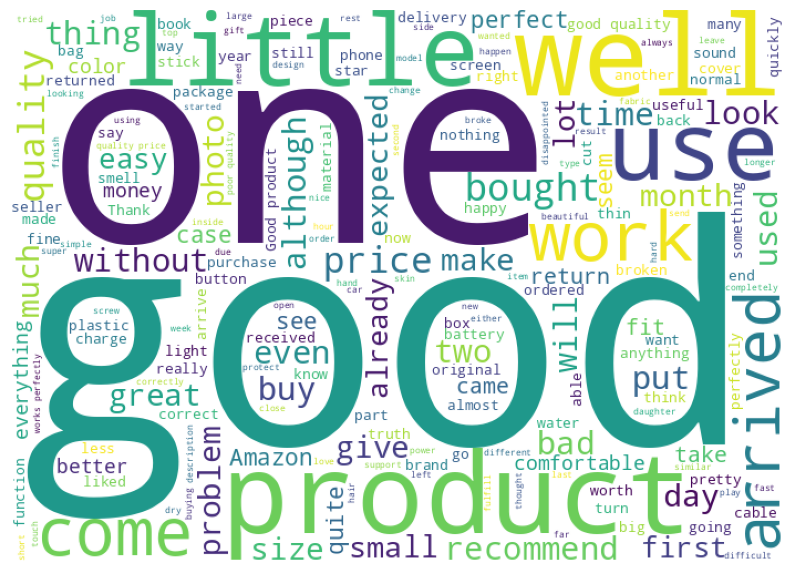

In [81]:
wordcloud(df,'translated_reviews')

### WordCloud on Low_Rating Reviews data

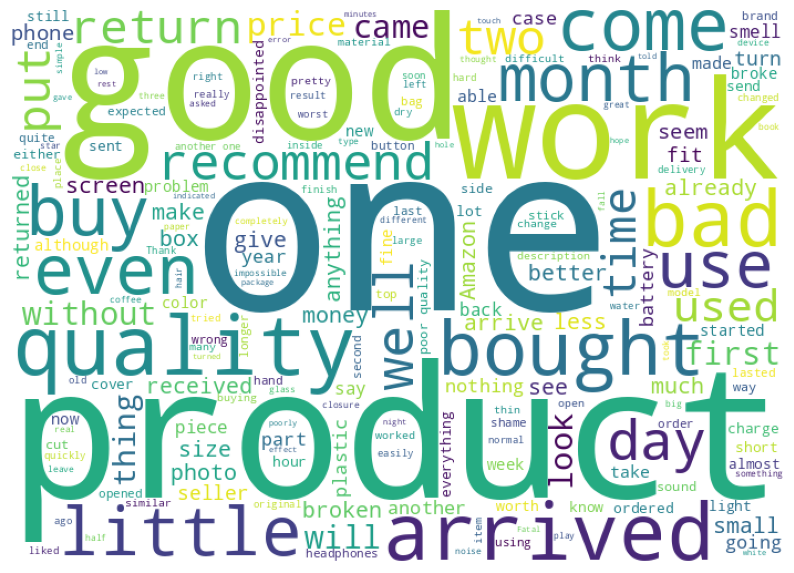

In [82]:
wordcloud(test,'translated_reviews')

## Keyphrase Extraction

### YAKE

In [83]:
!pip install yake

In [84]:
import yake
from yake import KeywordExtractor

In [85]:
def yake_extractor(data):
  keyword_extractor = yake.KeywordExtractor()
  keywords = keyword_extractor.extract_keywords(data)
  keyword_list = []
  for kw in keywords:
    keyword_list.append(kw[0])  # we want only keywords that why [0]
  return keyword_list

In [86]:
keywords = df.translated_reviews.apply(yake_extractor)
keywords

0      [arrived very quickly, booklet and activities,...
1      [units, needles, rest is perfect, package, per...
2      [beautiful film, perfect condition, discs, vid...
3      [Totally, photo, bought, total disappointment,...
4      [make the return, waiting to make, work, retur...
                             ...                        
995    [good product, product, Fast processing, good,...
996    [USA, firmly held, grip is firm, cables are fi...
997                                     [good, expected]
998    [matter how powerful, light, lamp, nice, bulb,...
999    [Perfect quality, good price, Perfect, quality...
Name: translated_reviews, Length: 1000, dtype: object

In [87]:
all_yake_keywords = []
for word in keywords:
  all_yake_keywords.extend(word)

cnt_yake = Counter(all_yake_keywords).most_common(20)
cnt_yake

[('good', 171),
 ('quality', 114),
 ('product', 104),
 ('price', 83),
 ('arrived', 73),
 ('bought', 67),
 ('bad', 55),
 ('time', 52),
 ('works', 50),
 ('perfectly', 46),
 ('recommend', 44),
 ('size', 42),
 ('work', 41),
 ('put', 41),
 ('Good', 41),
 ('expected', 41),
 ('buy', 40),
 ('small', 37),
 ('perfect', 36),
 ('thing', 35)]

## RAKE

In [88]:
!pip install rake_nltk

In [89]:
from rake_nltk import Rake

In [90]:
def rake_extractor(data):
  keyword_extractor = Rake()
  keyword_extractor.extract_keywords_from_text(data)
  return keyword_extractor.get_ranked_phrases()

In [91]:
rake_keywords = df.translated_reviews.apply(rake_extractor)
rake_keywords

0         [quickly, comes, booklet, arrived, activities]
1      [two without needles, 10 units came, rest, per...
2      [little space considering, right day, perfect ...
3      [totally different, total disappointment, stil...
4      [touch screen, work, work, waiting, terminal, ...
                             ...                        
995                      [good product, fast processing]
996    [firmly held, wall, use, usa, grip, firm, cabl...
997                                     [good, expected]
998    [one bulb, little light, little light, room, p...
999             [would buy, perfect quality, good price]
Name: translated_reviews, Length: 1000, dtype: object

In [93]:
all_rake_keyword = []
for word in rake_keywords:
  all_rake_keyword.extend(word)

cnt_r = Counter(all_rake_keyword).most_common(20)
cnt_r

[('good', 95),
 ('like', 70),
 ('use', 67),
 ('bought', 66),
 ('one', 62),
 ('product', 61),
 ('price', 52),
 ('recommend', 50),
 ('put', 49),
 ('well', 49),
 ('used', 42),
 ('lot', 41),
 ('buy', 41),
 ('arrived', 40),
 ('since', 40),
 ('although', 39),
 ('easy', 39),
 ('give', 37),
 ('quality', 36),
 ('expected', 36)]

# PREPROCESSING

In [95]:
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                   # and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]

# 5.autocorrect
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_words = []
    for word in data:
        corrected_words.append(spell(word))
    return corrected_words

# 6. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [ ]:
# as we dont have the labelled data,that why we used this for training purpose.

In [96]:
clean_text_train = df.translated_reviews.apply(remove_spaces)
clean_text_train = clean_text_train.apply(expand_text)
clean_text_train = clean_text_train.apply(handling_accented)
clean_text_train = clean_text_train.apply(clean_data)
clean_text_train = clean_text_train.apply(autocorrection)
clean_text_train = clean_text_train.apply(lemmatization)

In [97]:
clean_text_train

0                  arrived quickly come booklet activity
1      package unit came two without needle rest perfect
2      arrived perfect condition right day far seen f...
3      totally different photo bought print total dis...
4      waiting make return terminal not work touch sc...
                             ...                        
995                         good product fast processing
996    use wall appliance usa grip firm cable firmly ...
997                                        good expected
998    lamp nice give little light one bulb matter po...
999                 perfect quality good price would buy
Name: translated_reviews, Length: 1000, dtype: object

# Creating vector for Model Building

## CountVectorizer

In [98]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(clean_text_train) # output will be sparse matrix
bow = bow.A # conveting sparse matrix to array
pd.DataFrame(bow,columns = count_vect.get_feature_names_out())

,able,abroad,absolute,absolutely,absorbed,absorbs,absurd,abundant,abuse,accept,...,xperia,year,yellow,yellowish,yes,yesterday,yet,youtube,zero,zippered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Tfidf Vectorizer

In [99]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(clean_text_train)
tfidf = tfidf.A
pd.DataFrame(tfidf,columns = tfidf_vect.get_feature_names_out())

,able,abroad,absolute,absolutely,absorbed,absorbs,absurd,abundant,abuse,accept,...,xperia,year,yellow,yellowish,yes,yesterday,yet,youtube,zero,zippered
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Word2Vec

In [ ]:
# for this we want a input like [[R1],[R2],[R3]]
# data = [["Text data R1"], ["Text data R2"], ["Text data R3"]]

In [131]:
sent = clean_text_train.tolist()
splitted_sent_ = [sent_.split() for sent_ in sent]
splitted_sent_

[['arrived', 'quickly', 'come', 'booklet', 'activity'],
 ['package', 'unit', 'came', 'two', 'without', 'needle', 'rest', 'perfect'],
 ['arrived',
  'perfect',
  'condition',
  'right',
  'day',
  'far',
  'seen',
  'first',
  'one',
  'quality',
  'dvd',
  'vhs',
  'not',
  'remastered',
  'look',
  'grain',
  'even',
  'still',
  'beautiful',
  'film',
  'disc',
  'come',
  'drawing',
  'pack',
  'take',
  'little',
  'space',
  'considering',
  'disc',
  'give',
  'star',
  'video',
  'quality',
  'rest',
  'good'],
 ['totally',
  'different',
  'photo',
  'bought',
  'print',
  'total',
  'disappointment',
  'not',
  'one',
  'photo',
  'still',
  'wearable'],
 ['waiting',
  'make',
  'return',
  'terminal',
  'not',
  'work',
  'touch',
  'screen',
  'not',
  'work'],
 ['bought',
  'play',
  'vacation',
  'child',
  'success',
  'weighs',
  'little',
  'not',
  'big',
  'fulfilled',
  'objective',
  'used',
  'daily',
  'approximately',
  'day',
  'like',
  'new',
  'commendable'],

In [132]:
word_2vec_model = Word2Vec(splitted_sent_, min_count=2,window =3 )
# min_count : Minimum frequency count of words. Words with frequency less than this count will be ignored.
# window    : The maximum distance between the current and predicted word within a sentence.

In [103]:
word_2vec_model.save('word2vec.model')

# By saving the model, you can reuse it without having to retrain it from scratch.

In [104]:
word_2vec_model.vector_size

100

In [133]:
# document numerical format
def vectorizer(list_of_docs,model):
  feature = []
  for rew in list_of_docs:
    zero_vector = np.zeros(model.vector_size)
    vectors = []
    for word in rew:
      try:
        word in model.wv
        vectors.append(model.wv[word])#model.wv['bad']
      except KeyError:
        continue
    if vectors:
      vectors = np.asarray(vectors)
      avg_vec = vectors.mean(axis=0)
      feature.append(avg_vec)
    else:
      feature.append(zero_vector)
  return feature

In [134]:
vect_docs = vectorizer(splitted_sent_,word_2vec_model)

In [135]:
vect_docs

[array([-0.02605326,  0.04096614,  0.01250724,  0.00889751,  0.01502608,
        -0.06607127,  0.01519911,  0.0944694 , -0.0243772 , -0.02473589,
        -0.0103355 , -0.05624924, -0.00557103,  0.01241408,  0.01696114,
        -0.02766711,  0.01271107, -0.04083923,  0.00731999, -0.08527832,
         0.02650505,  0.02064042,  0.01487474, -0.02604187, -0.00546428,
         0.00152065, -0.05619037, -0.02045425, -0.03942776,  0.00265894,
         0.05044779,  0.0075098 ,  0.04378305, -0.0239746 , -0.01528745,
         0.03429612, -0.00594173, -0.05216271, -0.03206137, -0.08441781,
        -0.00264028, -0.03120219, -0.01867466,  0.00376595,  0.03169933,
        -0.02224958, -0.01777486,  0.00284605,  0.0227825 ,  0.03568971,
         0.03291116, -0.02957691, -0.02528813, -0.00065591, -0.02786182,
         0.01076785,  0.02101516, -0.00683769, -0.0466748 ,  0.01280721,
         0.01833528,  0.01199786,  0.00429735, -0.02685609, -0.06156965,
         0.04210368,  0.02530708,  0.04068622, -0.0

In [136]:
type(vect_docs)

list

In [137]:
x_emb = np.array(vect_docs)
x_emb

array([[-0.02605326,  0.04096614,  0.01250724, ..., -0.03170091,
         0.02652498, -0.03490504],
       [-0.0235154 ,  0.03315465,  0.0094502 , ..., -0.02893014,
         0.01819888, -0.03245497],
       [-0.03197589,  0.04628991,  0.00926421, ..., -0.0369037 ,
         0.02815403, -0.04132516],
       ...,
       [-0.05188842,  0.06963398,  0.01522055, ..., -0.05815981,
         0.03359962, -0.06255426],
       [-0.02478465,  0.04009698,  0.00940743, ..., -0.02965754,
         0.02853547, -0.03739307],
       [-0.0423907 ,  0.06649613,  0.014978  , ..., -0.05404411,
         0.03334113, -0.05596583]])

In [138]:
def build_model(clusters,data):
  kmeans_model = KMeans(n_clusters = clusters)
  y_pred = kmeans_model.fit_predict(data)
  return kmeans_model,y_pred

In [139]:
kmeans_model_count,count_pred = build_model(3,bow)

In [140]:
count_pred

array([0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [141]:
kmeans_model_tfidf,tfidf_pred = build_model(3,tfidf)

In [142]:
tfidf_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 2,
       0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2,
       0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0,
       1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 1,

In [143]:
kmeans_model_word2vec,word2vec_pred = build_model(3,x_emb)

In [144]:
x_emb.shape,bow.shape,tfidf.shape

((1000, 100), (1000, 2755), (1000, 2755))

# Evaluations

In [145]:
print(f"Silhouette score with kmeans count : {silhouette_score(bow,count_pred)}")

print(f"Silhouette score with kmeans tfidf : {silhouette_score(tfidf,tfidf_pred)}")

print(f"Silhouette score with kmeans word2vec : {silhouette_score(x_emb,word2vec_pred)}")

Silhouette score with kmeans count : 0.17611543440011693
Silhouette score with kmeans tfidf : 0.005551839285443581
Silhouette score with kmeans word2vec : 0.4885121348787777


# Silhouette visualization

In [147]:
def visualize_silhouette(data,model,title1):
  print(f'Silhouette visualizer for {title1}')
  visualizer = SilhouetteVisualizer(model,colors="yellowbrick")
  visualizer.fit(data)
  visualizer.show()

Silhouette visualizer for kmeans-count vectorizer


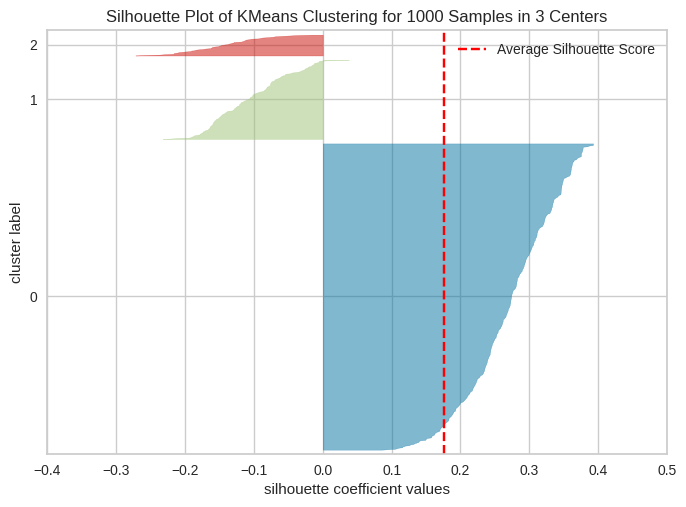

In [148]:
visualize_silhouette(bow,kmeans_model_count,"kmeans-count vectorizer")

Silhouette visualizer for kmeans-tfidf vectorizer


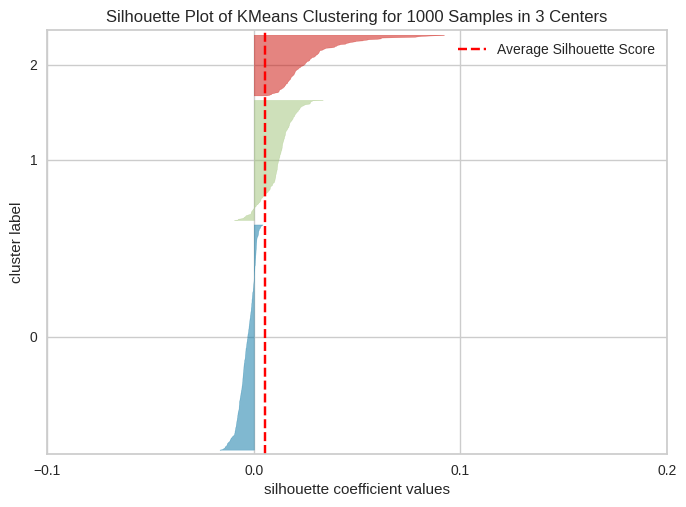

In [149]:
visualize_silhouette(tfidf,kmeans_model_tfidf,"kmeans-tfidf vectorizer")

Silhouette visualizer for kmeans-wprd2vec


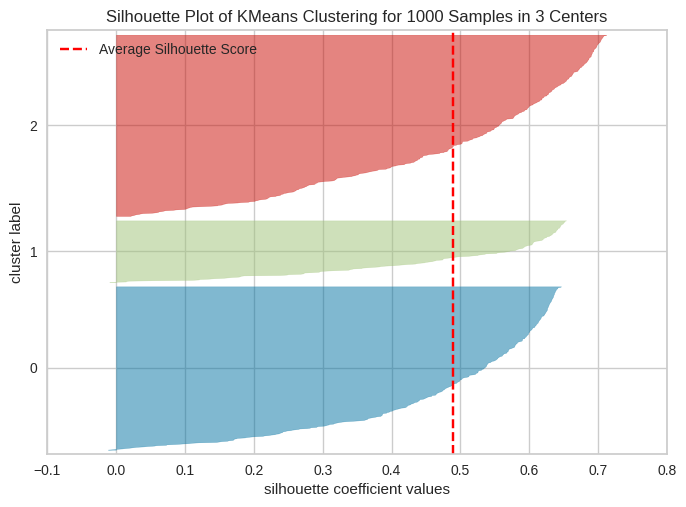

In [150]:
visualize_silhouette(x_emb,kmeans_model_word2vec,"kmeans-wprd2vec")

In [151]:
df['target'] = pd.Series(word2vec_pred)
df

,review_body,stars,language,translated_reviews,target
0,"Llegó muy rápido, viene con un cuadernillo y d...",4,es,"It arrived very quickly, it comes with a bookl...",2
1,El paquete de 10 unidades me ha venido con dos...,2,es,The package of 10 units came with two without ...,0
2,Me ha llegado en perfectas condiciones y el dí...,4,es,It arrived to me in perfect condition and on t...,2
3,Totalmente distinto al de la foto q tenían cua...,3,es,Totally different from the photo they had when...,2
4,"Estoy esperando para hacer la devolución, el t...",1,es,"I'm waiting to make the return, the terminal d...",1
...,...,...,...,...,...
995,Muy buen producto. Trámite rapido,5,es,Very good product. Fast processing,1
996,Lo utilizo para la pared con unos electrodomes...,4,es,I use it for the wall with some appliances fro...,0
997,Todo bien.lo q esperaba,5,es,"All good, what I expected",1
998,"La lámpara es muy bonita pero da muy poca luz,...",2,es,The lamp is very nice but it gives very little...,2
